In [1]:
pip install pymysql

  Using cached PyMySQL-1.1.1-py3-none-any.whl.metadata (4.4 kB)
Using cached PyMySQL-1.1.1-py3-none-any.whl (44 kB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pymysql
conn=pymysql.connect(host='localhost', user='root', password="", db='',)
cursor=conn.cursor()
query="create database  Students"
try:
    
    cursor.execute(query)
    print("Database Created")
except Exception as e:
    print("Error: ", e)
finally:
    conn.close()

Database Created


In [7]:
conn=pymysql.connect(host='localhost', user='root', password="", db='Students',)
cursor=conn.cursor()
query="create table Students_project(Student_ID int(11) auto_increment primary key, Student_Name varchar(200) NOT NULL, Physics int(20), Chemistry int(20), Mathematics int(20), Standard varchar(30), Remark varchar(30))"
try:
    cursor.execute(query)
    print("Table Created")
except Exception as e:
    print("Error:", e)
finally:
    conn.close()

Table Created


In [9]:
# Connect to the database
conn = pymysql.connect(
    host='localhost',
    user='root',
    password='',
    db='Students'
)

try:
    cursor = conn.cursor()
    
    # Define the SQL insert query
    query = """
    INSERT INTO Students_project (Student_Name, Physics, Chemistry, Mathematics, Standard, Remark)
    VALUES (%s, %s, %s, %s, %s, %s)
    """
    
    # List of 20 sample student records
    Students_project = [
        ("Rohan Mehta", 78, 82, 89, "10th", "Good"),
        ("Sneha Sharma", 88, 91, 84, "10th", "Excellent"),
        ("Amit Yadav", 65, 70, 60, "10th", "Average"),
        ("Priya Verma", 92, 95, 97, "10th", "Outstanding"),
        ("Ankit Singh", 55, 60, 58, "10th", "Needs Improvement"),
        ("Kavya Jain", 83, 79, 88, "10th", "Good"),
        ("Rahul Chauhan", 45, 50, 40, "10th", "Poor"),
        ("Neha Dubey", 90, 93, 91, "10th", "Excellent"),
        ("Mohit Agarwal", 76, 74, 80, "10th", "Good"),
        ("Simran Kaur", 68, 72, 69, "10th", "Average"),
        ("Arjun Desai", 88, 85, 90, "10th", "Excellent"),
        ("Ishita Rao", 95, 98, 97, "10th", "Outstanding"),
        ("Ravi Patel", 54, 52, 59, "10th", "Needs Improvement"),
        ("Tanvi Bansal", 73, 75, 70, "10th", "Good"),
        ("Nikhil Reddy", 60, 65, 63, "10th", "Average"),
        ("Pooja Joshi", 86, 90, 88, "10th", "Excellent"),
        ("Sahil Khan", 47, 49, 45, "10th", "Poor"),
        ("Ritika Gupta", 78, 76, 80, "10th", "Good"),
        ("Aditya Sinha", 91, 89, 92, "10th", "Excellent"),
        ("Meena Kumari", 66, 64, 61, "10th", "Average"),
    ]
    
    # Insert all rows
    cursor.executemany(query, Students_project)
    
    # Commit the changes
    conn.commit()

    # print(f"{cursor.rowcount} student records inserted successfully!")
    print("'%d' Insertion Successfully...!" %(cursor.rowcount))
except Exception as e:
    print("Error: ", e)

finally:
    conn.close()

'20' Insertion Successfully...!


<h3>Subject-Wise Average Marks</h3>

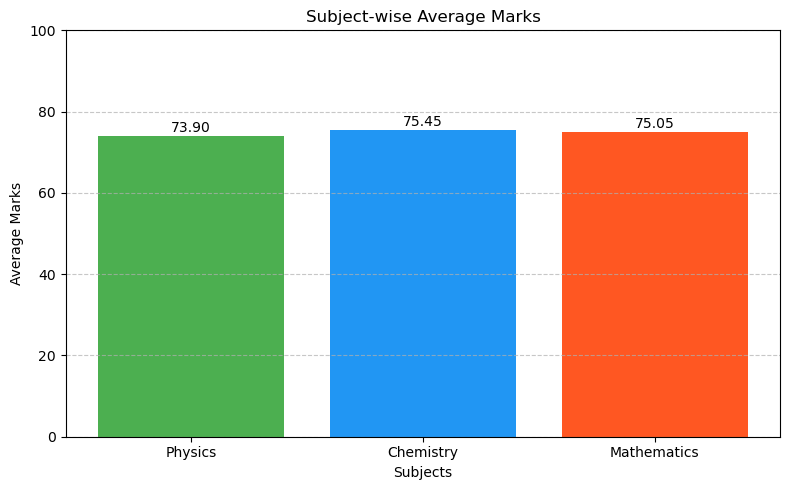

In [11]:
import matplotlib.pyplot as plt

# Connect to the MySQL database
conn = pymysql.connect(
    host='localhost',
    user='root',
    password='',
    db='Students'
)

try:
    cursor = conn.cursor()

    # Query to calculate average marks for each subject
    query = """
    SELECT 
        AVG(Physics), 
        AVG(Chemistry), 
        AVG(Mathematics) 
    FROM Students_project
    """
    
    cursor.execute(query)
    result = cursor.fetchone()  # Fetch single row with 3 averages
    
    subjects = ['Physics', 'Chemistry', 'Mathematics']
    avg_marks = list(result)

    # Plotting
    plt.figure(figsize=(8, 5))
    plt.bar(subjects, avg_marks, color=['#4CAF50', '#2196F3', '#FF5722'])
    plt.title('Subject-wise Average Marks')
    plt.xlabel('Subjects')
    plt.ylabel('Average Marks')
    plt.ylim(0, 100)  # Assuming marks are out of 100
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Annotate bar values
    for i, val in enumerate(avg_marks):
        plt.text(i, val + 1, f"{val:.2f}", ha='center', fontsize=10)

    plt.tight_layout()
    plt.show()

except Exception as e:
    print("Error:", e)

finally:
    conn.close()

<h3>Individual-Student Perfomance</h3>

Enter Student ID:  20


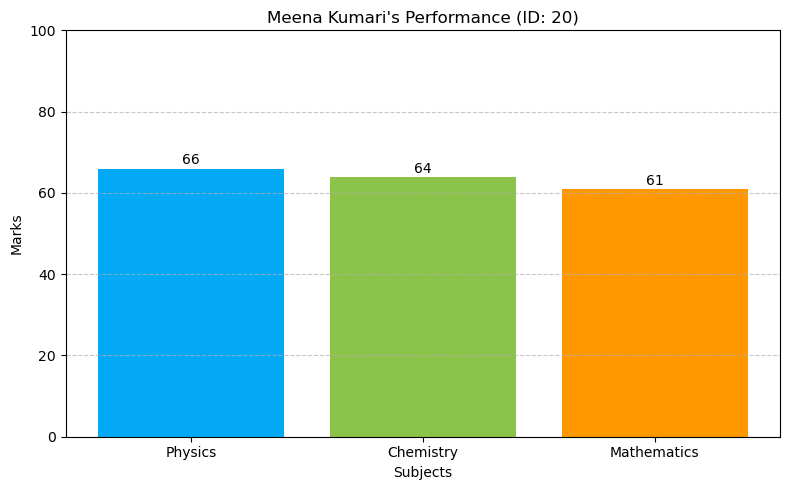

In [13]:
import pymysql
import matplotlib.pyplot as plt

# Input the student ID you want to analyze
student_id = int(input("Enter Student ID: "))

# Connect to the MySQL database
conn = pymysql.connect(
    host='localhost',
    user='root',
    password='',
    db='Students'
)

try:
    cursor = conn.cursor()

    # Query to fetch student name and marks based on Student_ID
    query = """
    SELECT Student_Name, Physics, Chemistry, Mathematics 
    FROM Students_project 
    WHERE Student_ID = %s
    """
    
    cursor.execute(query, (student_id,))
    result = cursor.fetchone()

    if result:
        student_name = result[0]
        subjects = ['Physics', 'Chemistry', 'Mathematics']
        marks = list(result[1:])

        # Plotting
        plt.figure(figsize=(8, 5))
        plt.bar(subjects, marks, color=['#03A9F4', '#8BC34A', '#FF9800'])
        plt.title(f"{student_name}'s Performance (ID: {student_id})")
        plt.xlabel('Subjects')
        plt.ylabel('Marks')
        plt.ylim(0, 100)  # Assuming marks are out of 100
        plt.grid(axis='y', linestyle='--', alpha=0.7)

        # Annotate bar values
        for i, val in enumerate(marks):
            plt.text(i, val + 1, str(val), ha='center', fontsize=10)

        plt.tight_layout()
        plt.show()
    else:
        print("No student found with that ID.")

except Exception as e:
    print("Error:", e)

finally:
    conn.close()

<h3>Remark Distribution</h3>

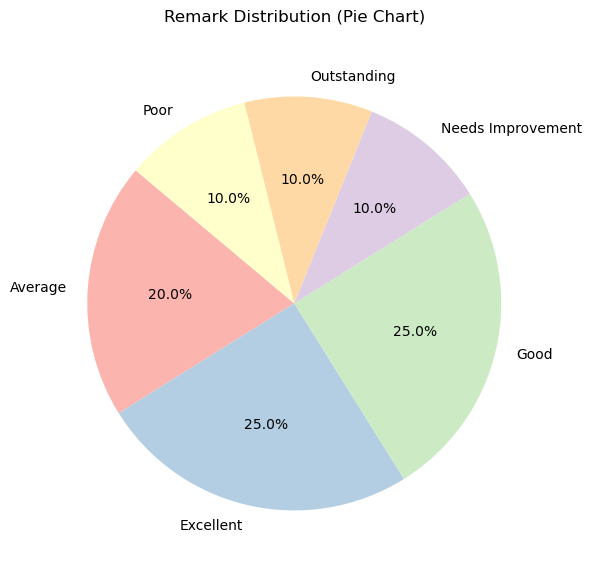

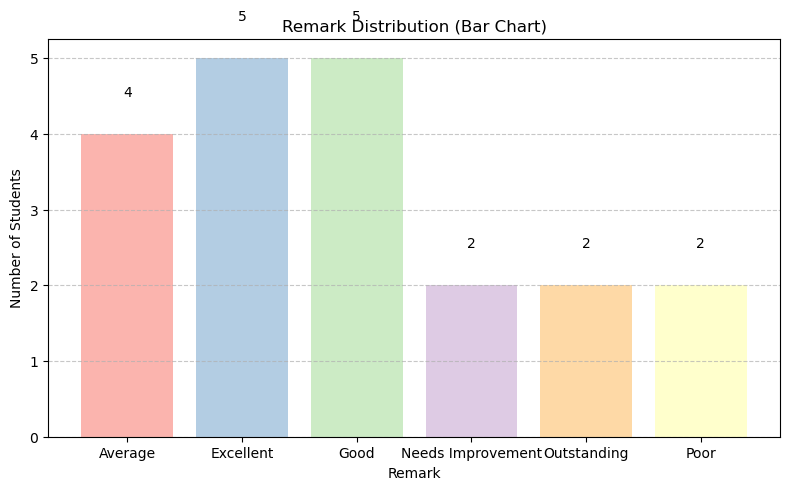

In [15]:
import pymysql
import matplotlib.pyplot as plt

# Connect to the MySQL database
conn = pymysql.connect(
    host='localhost',
    user='root',
    password='',
    db='Students'
)

try:
    cursor = conn.cursor()

    # Query to count number of students in each remark category
    query = """
    SELECT Remark, COUNT(*) 
    FROM Students_project 
    GROUP BY Remark
    """

    cursor.execute(query)
    result = cursor.fetchall()

    # Separate data into labels and counts
    labels = [row[0] for row in result]
    counts = [row[1] for row in result]

    # --- Pie Chart ---
    plt.figure(figsize=(6, 6))
    plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
    plt.title("Remark Distribution (Pie Chart)")
    plt.axis('equal')  # Equal aspect ratio ensures the pie is a circle
    plt.tight_layout()
    plt.show()

    # --- Bar Chart ---
    plt.figure(figsize=(8, 5))
    plt.bar(labels, counts, color=plt.cm.Pastel1.colors)
    plt.title("Remark Distribution (Bar Chart)")
    plt.xlabel("Remark")
    plt.ylabel("Number of Students")
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Annotate bar values
    for i, val in enumerate(counts):
        plt.text(i, val + 0.5, str(val), ha='center', fontsize=10)

    plt.tight_layout()
    plt.show()

except Exception as e:
    print("Error:", e)

finally:
    conn.close()

<h3>Top-5 Students By Total Marks</h3>

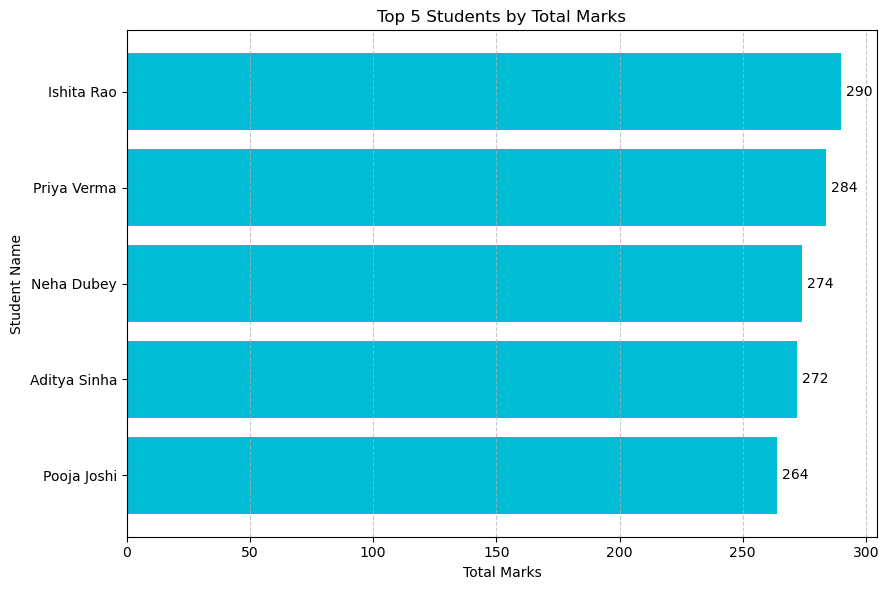

In [17]:
import pymysql
import matplotlib.pyplot as plt

# Connect to the MySQL database
conn = pymysql.connect(
    host='localhost',
    user='root',
    password='',
    db='Students'
)

try:
    cursor = conn.cursor()

    # Query to fetch top 5 students by total marks
    query = """
    SELECT Student_Name, (Physics + Chemistry + Mathematics) AS Total_Marks 
    FROM Students_project 
    ORDER BY Total_Marks DESC 
    LIMIT 5
    """

    cursor.execute(query)
    result = cursor.fetchall()

    # Extract names and total marks
    names = [row[0] for row in result]
    total_marks = [row[1] for row in result]

    # Reverse for horizontal bar chart (top to bottom)
    names.reverse()
    total_marks.reverse()

    # Plotting
    plt.figure(figsize=(9, 6))
    plt.barh(names, total_marks, color='#00BCD4')
    plt.title("Top 5 Students by Total Marks")
    plt.xlabel("Total Marks")
    plt.ylabel("Student Name")
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    # Annotate marks
    for i, val in enumerate(total_marks):
        plt.text(val + 2, i, str(val), va='center', fontsize=10)

    plt.tight_layout()
    plt.show()

except Exception as e:
    print("Error:", e)

finally:
    conn.close()

<h3>Correlation Between Subjects</h3>

C:\Users\HP\AppData\Local\Temp\ipykernel_10256\88213801.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)



📈 Correlation Matrix:
              Physics  Chemistry  Mathematics
Physics      1.000000   0.979608     0.973298
Chemistry    0.979608   1.000000     0.949361
Mathematics  0.973298   0.949361     1.000000


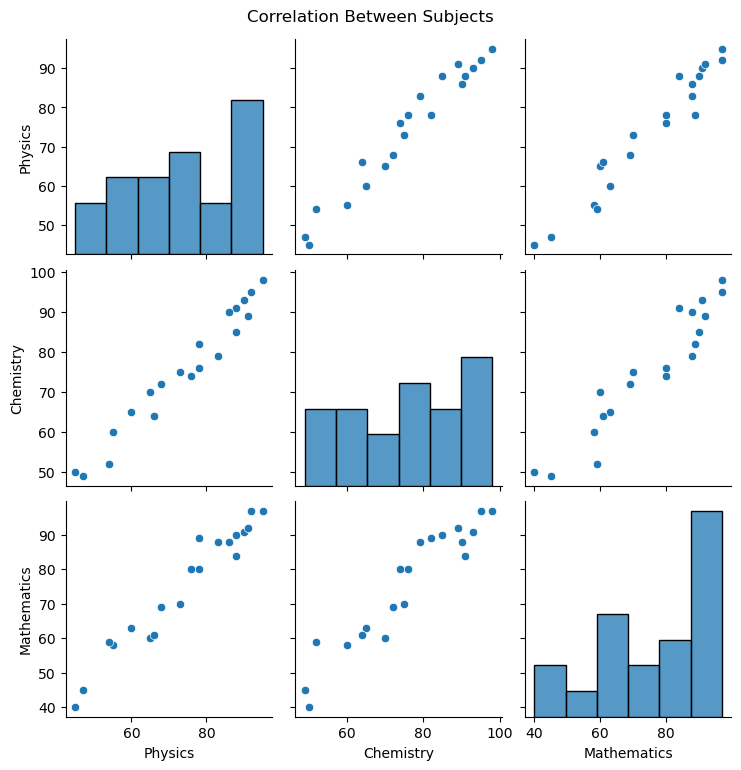

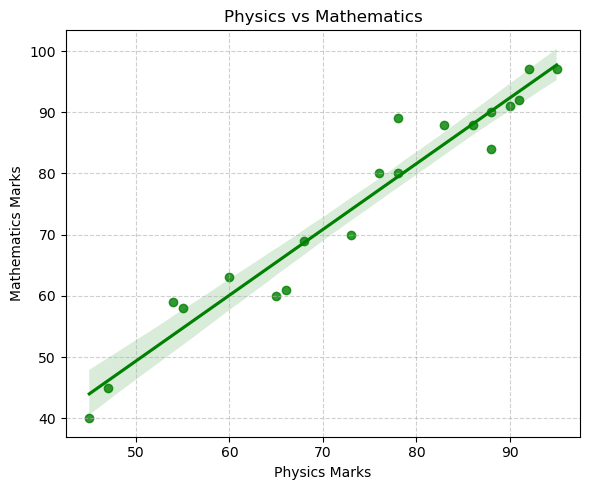

In [19]:
import pymysql
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Connect to the MySQL database
conn = pymysql.connect(
    host='localhost',
    user='root',
    password='',
    db='Students'
)

try:
    # Load data into a Pandas DataFrame for easier handling
    query = "SELECT Physics, Chemistry, Mathematics FROM Students_project"
    df = pd.read_sql(query, conn)

    # Display correlation matrix
    print("\n📈 Correlation Matrix:")
    print(df.corr())

    # Plot pairwise scatter plots
    sns.pairplot(df)
    plt.suptitle("Correlation Between Subjects", y=1.02)
    plt.show()

    # Optional: Specific scatter plot (e.g., Physics vs Mathematics)
    plt.figure(figsize=(6, 5))
    sns.regplot(x='Physics', y='Mathematics', data=df, color='green')
    plt.title("Physics vs Mathematics")
    plt.xlabel("Physics Marks")
    plt.ylabel("Mathematics Marks")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

except Exception as e:
    print("Error:", e)

finally:
    conn.close()